In [6]:
dir = '../../../../Data/Weather/global_statistics/'
!ls $dir

STAT_MDPR.pkl STAT_all.pkl


In [7]:
import pickle as pk

In [8]:
with open(dir+'STAT_all.pkl','rb') as pickle_file:
    STAT = pk.load(pickle_file)

In [9]:
type(STAT)

dict

In [10]:
STAT.keys()

dict_keys(['PRCP', 'SNWD', 'SNOW', 'TMIN', 'TMAX', 'TOBS'])

In [13]:
TOBS_S=STAT['TOBS']
TOBS_S.keys()

dict_keys(['mean', 'E', 'Var', 'Cov', 'low100', 'eigvec', 'NE', 'SortedVals', 'high1000', 'low1000', 'high100', 'eigval', 'O', 'NO', 'std', 'Mean', 'UnDef'])

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


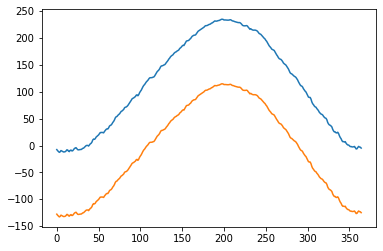

In [24]:
mean=TOBS_S['Mean']
std=TOBS_S['std']

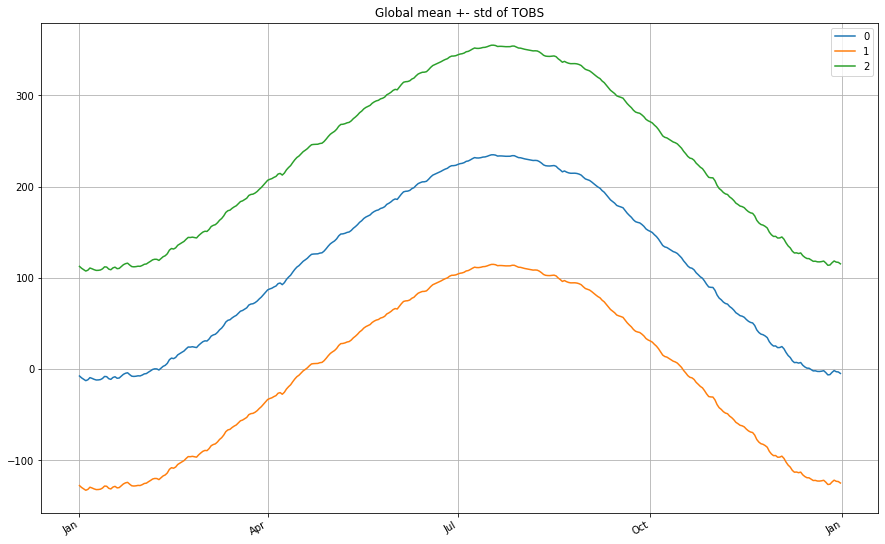

In [29]:
from lib.YearPlotter import YearPlotter
_figsize=[15,10]
T=np.stack([mean,mean-std,mean+std])

fig, ax = plt.subplots(figsize=_figsize);
YP=YearPlotter()
YP.plot(T.transpose(),fig,ax,title='Global mean +- std of TOBS');
plt.savefig('TOBS.png')


In [31]:
eigval=TOBS_S['eigval']

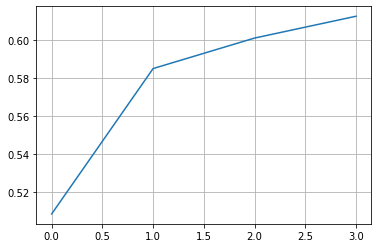

In [39]:
cum_eig=np.cumsum(eigval)
cum_eig /= cum_eig[-1]
plot(cum_eig[:4])
grid()

In [36]:
eigvec=TOBS_S['eigvec']
eigvec.shape

(365, 365)

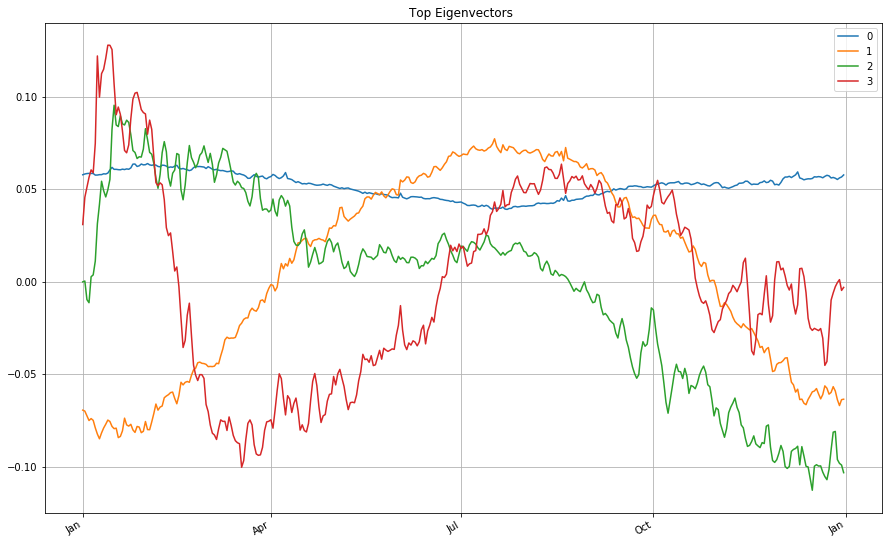

In [40]:
fig, axis = plt.subplots(figsize=_figsize);
YP.plot(eigvec[:,:4],fig,axis,title='Top Eigenvectors ')